In [23]:
import wrangle as w
import explore as e
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
df = w.wrangle_data()
df.head()

Found Data


,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigned,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
df.copy = e.bin_data(df)
df.copy.head()

,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigned,default,credit_bin,age_bin,interest_bin,loan_amount_bin,income_bin,years_employed,years_employed_bin
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,500s,56-59,11-15,50k-100k,60k-90k,6.666667,5-6
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,400s,66-69,2-6,100k-150k,30k-60k,1.250000,0-2
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,400s,46-49,20-25,100k-150k,60k-90k,2.166667,0-2
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,700s,30-35,7-10,5k-50k,30k-60k,0.000000,0-2
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,600s,60-65,2-6,5k-50k,15k-30k,0.666667,0-2


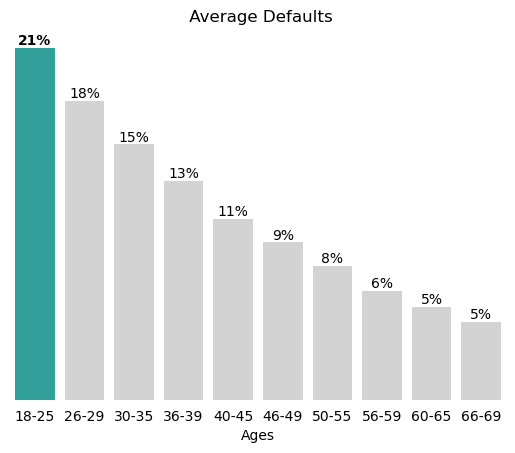

In [4]:
e.plt_2(df.copy)

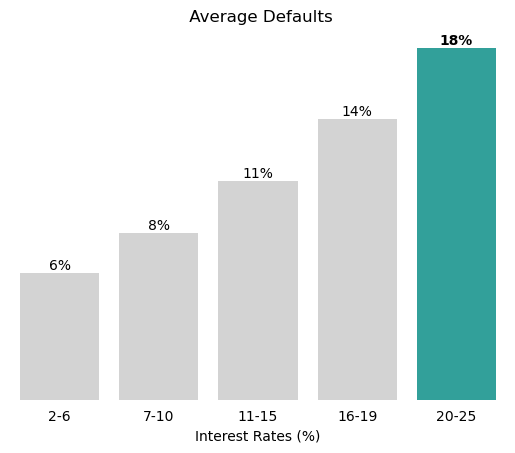

In [5]:
e.plt_1(df.copy)

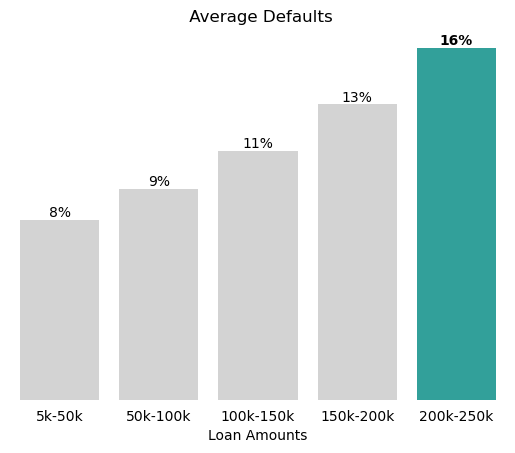

In [6]:
e.plt_3(df.copy)

In [7]:
def xy_split(df):
    
    return df.drop(columns= 'default'), df.default

In [8]:
x_train, y_train = xy_split(df.copy)

In [9]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: default, dtype: int64

In [10]:
x_train = pd.get_dummies(x_train)

In [11]:
x_train.head()

,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,years_employed,education_Bachelor's,education_High School,education_Master's,education_PhD,employment_type_Full-time,employment_type_Part-time,employment_type_Self-employed,employment_type_Unemployed,marital_status_Divorced,marital_status_Married,marital_status_Single,mortgage_No,mortgage_Yes,dependents_No,dependents_Yes,loan_purpose_Auto,loan_purpose_Business,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,cosigned_No,cosigned_Yes,credit_bin_300s,credit_bin_400s,credit_bin_500s,credit_bin_600s,credit_bin_700s,credit_bin_800s,age_bin_18-25,age_bin_26-29,age_bin_30-35,age_bin_36-39,age_bin_40-45,age_bin_46-49,age_bin_50-55,age_bin_56-59,age_bin_60-65,age_bin_66-69,interest_bin_2-6,interest_bin_7-10,interest_bin_11-15,interest_bin_16-19,interest_bin_20-25,loan_amount_bin_5k-50k,loan_amount_bin_50k-100k,loan_amount_bin_100k-150k,loan_amount_bin_150k-200k,loan_amount_bin_200k-250k,income_bin_15k-30k,income_bin_30k-60k,income_bin_60k-90k,income_bin_90k-120k,income_bin_120k-150k,years_employed_bin_0-2,years_employed_bin_3-4,years_employed_bin_5-6,years_employed_bin_7-8,years_employed_bin_9-10
0,56,85994,50587,520,80,4,15.23,36,0.44,6.666667,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,1.250000,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.166667,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0.000000,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0.666667,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [12]:
df.loan_term

0         36
1         60
2         24
3         24
4         48
          ..
255342    12
255343    24
255344    60
255345    48
255346    12
Name: loan_term, Length: 255347, dtype: int64

In [13]:
def get_continuous_feats(df) -> list:
    '''
    find all continuous numerical features
    
    return: list of column names (strings)
    '''
    num_cols = []
    num_df = df.select_dtypes('number')
    for col in num_df:
        if num_df[col].nunique() > :
            num_cols.append(col)
    return num_cols

In [14]:
num_cols = get_continuous_feats(x_train)
num_cols.append('loan_term')
num_cols

['age',
 'income',
 'loan_amount',
 'credit_score',
 'months_employed',
 'interest_rate',
 'loan_term',
 'dti_ratio',
 'years_employed',
 'loan_term']

In [15]:
scaler = MinMaxScaler()

#fit the thing
scaler.fit(x_train[num_cols])


#use the thing
x_train[num_cols] = scaler.transform(x_train[num_cols])


x_train.head()

,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,years_employed,education_Bachelor's,education_High School,education_Master's,education_PhD,employment_type_Full-time,employment_type_Part-time,employment_type_Self-employed,employment_type_Unemployed,marital_status_Divorced,marital_status_Married,marital_status_Single,mortgage_No,mortgage_Yes,dependents_No,dependents_Yes,loan_purpose_Auto,loan_purpose_Business,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,cosigned_No,cosigned_Yes,credit_bin_300s,credit_bin_400s,credit_bin_500s,credit_bin_600s,credit_bin_700s,credit_bin_800s,age_bin_18-25,age_bin_26-29,age_bin_30-35,age_bin_36-39,age_bin_40-45,age_bin_46-49,age_bin_50-55,age_bin_56-59,age_bin_60-65,age_bin_66-69,interest_bin_2-6,interest_bin_7-10,interest_bin_11-15,interest_bin_16-19,interest_bin_20-25,loan_amount_bin_5k-50k,loan_amount_bin_50k-100k,loan_amount_bin_100k-150k,loan_amount_bin_150k-200k,loan_amount_bin_200k-250k,income_bin_15k-30k,income_bin_30k-60k,income_bin_60k-90k,income_bin_90k-120k,income_bin_120k-150k,years_employed_bin_0-2,years_employed_bin_3-4,years_employed_bin_5-6,years_employed_bin_7-8,years_employed_bin_9-10
0,0.745098,0.525885,0.186070,0.400729,0.672269,4,0.575217,0.50,0.4250,0.672269,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1.000000,0.262461,0.487512,0.287796,0.126050,1,0.122174,1.00,0.7250,0.126050,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,0.549020,0.512656,0.506892,0.275046,0.218487,3,0.833478,0.25,0.2625,0.218487,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0.274510,0.123801,0.162446,0.806922,0.000000,3,0.220435,0.25,0.1625,0.000000,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,4,0.196087,0.75,0.7875,0.067227,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [31]:
x_train.shape

(255347, 68)

In [26]:
rf = RandomForestClassifier(bootstrap=True,  
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=20, class_weight = 'balanced')

In [27]:
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=3,
                       random_state=20)

In [33]:
y_actual = y_train

In [28]:
y_pred = rf.predict(x_train)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [29]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.68


In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79    225694
           1       0.21      0.66      0.32     29653

    accuracy                           0.68    255347
   macro avg       0.58      0.67      0.55    255347
weighted avg       0.85      0.68      0.73    255347



In [42]:
y_train.mode()

0    0
Name: default, dtype: int64

In [39]:
baseline_pred = 0

In [37]:
baseline = (y_train == 0).mean()
baseline

0.8838717509898295

In [56]:
model_accuracy = (y_pred == y_actual).mean()
baseline_accuracy = baseline

print(f'   model accuracy: {model_accuracy:.2%}')
print(f'baseline accuracy: {baseline_accuracy:.2%}')


   model accuracy: 67.55%
baseline accuracy: 88.39%


In [54]:
def get_discrete_feats(df):
    '''
    find all continuous numerical features
    
    return: list of column names (strings)
    '''
    cat_cols = []
    
    cat_df = df.select_dtypes('object')
    
    for col in cat_df:
        
        if cat_df[col].nunique() > 0:
            
            cat_cols.append(col)
    cat_cols.append('loan_term')
    
    return cat_cols

In [55]:
cat = get_discrete_feats(df)
cat

['education',
 'employment_type',
 'marital_status',
 'mortgage',
 'dependents',
 'loan_purpose',
 'cosigned',
 'loan_term']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   age                 255347 non-null  int64   
 1   income              255347 non-null  int64   
 2   loan_amount         255347 non-null  int64   
 3   credit_score        255347 non-null  int64   
 4   months_employed     255347 non-null  int64   
 5   num_credit_lines    255347 non-null  int64   
 6   interest_rate       255347 non-null  float64 
 7   loan_term           255347 non-null  int64   
 8   dti_ratio           255347 non-null  float64 
 9   education           255347 non-null  object  
 10  employment_type     255347 non-null  object  
 11  marital_status      255347 non-null  object  
 12  mortgage            255347 non-null  object  
 13  dependents          255347 non-null  object  
 14  loan_purpose        255347 non-null  object  
 15  cosigned         